### Handwritten digit recognition using SVM

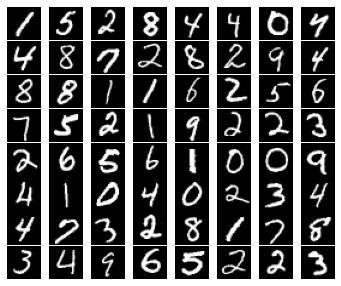

### import Pakage

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

##### Download Dataset From Kaggle 

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!pwd

/content


In [ ]:
!cp /content/kaggle.json ~/.kaggle

In [ ]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 84.2MB/s]
 82% 5.00M/6.09M [00:00<00:00, 46.2MB/s]
100% 6.09M/6.09M [00:00<00:00, 38.9MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 197MB/s]


In [ ]:
!mkdir /content/mnist_dataset

In [ ]:
!unzip train.csv.zip -d /content/mnist_dataset

Archive:  train.csv.zip
  inflating: /content/mnist_dataset/train.csv  


In [ ]:
!unzip test.csv.zip -d /content/mnist_dataset

Archive:  test.csv.zip
  inflating: /content/mnist_dataset/test.csv  


In [ ]:
%cd /content/mnist_dataset

/content/mnist_dataset


#### Read Dataset

In [ ]:
train_data = pd.read_csv('train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.shape

(42000, 785)

In [ ]:
np.unique(train_data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
X = train_data.drop("label", axis = 1)
y = train_data['label']

In [ ]:
X.loc[4,:][256:270]

pixel256      0
pixel257      0
pixel258    136
pixel259    253
pixel260    253
pixel261    253
pixel262    229
pixel263     77
pixel264      0
pixel265      0
pixel266      0
pixel267     70
pixel268    218
pixel269    253
Name: 4, dtype: int64

In [ ]:
# normalize the features
X_norm = X / 255.0

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train.loc[4,:][256:270]

pixel256    0.000000
pixel257    0.000000
pixel258    0.533333
pixel259    0.992157
pixel260    0.992157
pixel261    0.992157
pixel262    0.898039
pixel263    0.301961
pixel264    0.000000
pixel265    0.000000
pixel266    0.000000
pixel267    0.274510
pixel268    0.854902
pixel269    0.992157
Name: 4, dtype: float64

In [ ]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (33600, 784)
y_train shape: (33600,)
X_test shape: (8400, 784)
y_test shape: (8400,)


#### SVM Model 

In [ ]:
# linear model
model_linear = SVC(gamma=0.1, C=10, kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy: 0.925952380952381


In [ ]:
# non-linear model
non_linear_model = SVC(gamma=0.01, C=20, kernel='rbf')
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [ ]:
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy: 0.979047619047619


In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data.shape

(28000, 784)

In [ ]:
# normalize the features
test_norm = test_data/255.0

In [ ]:
# predict results
results = non_linear_model.predict(test_norm)

In [ ]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
image_id = list(range(1,28001))

In [ ]:
data_frame = pd.DataFrame({'ImageId':image_id, 'Label':results})

In [ ]:
data_frame.to_csv('submission.csv', index=False)